Sonia Bouden
# TP Chaines de Markov et HMM

#### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I.1 Fonctions dont vous pouvez avoir besoin

In [1]:
data_p = './data_txt_compact/'
data_b = '../'

In [90]:
dic = {'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }
dic_inv = {v: k for k, v in dic.items()}
dic

{'1': ' ',
 '2': 'a',
 '3': 'b',
 '4': 'c',
 '5': 'd',
 '6': 'e',
 '7': 'f',
 '8': 'g',
 '9': 'h',
 '10': 'i',
 '11': 'j',
 '12': 'k',
 '13': 'l',
 '14': 'm',
 '15': 'n',
 '16': 'o',
 '17': 'p',
 '18': 'q',
 '19': 'r',
 '20': 's',
 '21': 't',
 '22': 'u',
 '23': 'v',
 '24': 'w',
 '25': 'x',
 '26': 'y',
 '27': 'z',
 '28': ' '}

### II. Chaîne de Markov
#### 2.a Matrice de transitions

In [91]:
big_eng = 'bigramenglish.txt'
eng = np.loadtxt(big_eng)
eng.shape

(28, 28)

Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i. La première ligne (1,j) de la matrice de transition correspond à la probabilité de transiter de l'état initial 1 aux autres états j.
Les termes de la dernière colonne (i,n) correspondent aux probabilités de passer d'un état i à l'état final n.

la loi uniforme (rand) 
la loi discrète des états suivants

A partir de ce vecteur, si je cherche la fonction de répartition 
sur le segment les valeurs des segments on utilise la somme 

#### Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [5]:
[dic[str(x+1)] for x in eng.argmax(axis=1)]

['t',
 'n',
 'e',
 'o',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'o',
 ' ',
 'e',
 'e',
 ' ',
 'n',
 'e',
 'u',
 'e',
 ' ',
 'h',
 'r',
 'e',
 'a',
 't',
 ' ',
 'e',
 ' ']

#### I.2.b Générer un mot à partir de l'état initial (espace de début de mot)

In [183]:
def etat_suivant(etat_t, mat_transition):
    unif = np.random.random()
    cs = np.cumsum(mat_transition[int(etat_t)])  # on commence par l'état 1
    x = cs > unif
    etat_suiv = list(x).index(True)+1
    return etat_suiv

In [184]:
etat_suivant(1,eng)

15

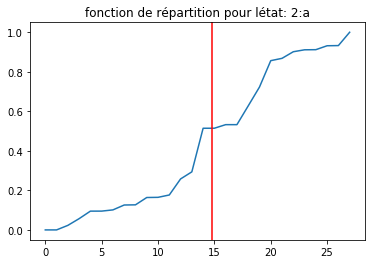

In [28]:
plt.plot(np.cumsum(eng[1]))
plt.title('fonction de répartition pour l''état: 2:a')
plt.axvline(np.random.random()*28, c='red')
plt.show()

In [29]:
#### Méthode du corrigé

def etat_suivant_c(ligne_A):
    unif = np.random.random()
    cs = np.cumsum(ligne_A)
    state = 0
    while (unif >= cs[state]):
        state = state+1
    return state+1
etat_suivant_c(eng[1])

21

#### Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28).

In [185]:
def genere_state_seq(mat):
    state = 1
    seq = [state]
    while state != 28:
        next_state = etat_suivant(state, mat)
        seq.append(next_state)
        state = next_state
    return seq

In [94]:
genere_state_seq(eng)

[1, 21, 15, 21, 20, 9, 15, 7, 9, 15, 19, 20, 10, 22, 6, 2, 6, 16, 28]

#### Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire.

In [58]:
def display_seq(seq_state):
    seq_carac = [dic[str(x)] for x in seq_state]
    pl = ''.join(seq_carac)
    pl = pl.replace(' ','')
    return pl

In [95]:
display_seq([1, 14, 12, 6, 28])

'mke'

#### Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [60]:
display_seq(genere_state_seq(eng))

'nueo'

### I.2.c Générer une phrase
On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [159]:
def modifie_mat_dic(mat):
    global dic
    global dic_inv
    global eng
    global fr
    
    dic['29'] = '.'
    dic_inv['.'] = '29'
    mat = np.c_[mat, np.zeros((28,1))]
    mat = np.r_[mat, np.zeros((1,29))]
    mat[-2,-1] = 0.1
    mat[-2,-2] = 0
    mat[-2,0] = 0.9
    return mat

In [269]:
modif_eng = modifie_mat_dic(eng)
#modifie_mat_dic(fr)

In [36]:
display_seq(genere_state_seq(eng))

' asst  hild  wrmalllen  e  pren  wemymilteral  th  emere  th  i  hait  ansty  wonfof  me  fte  is  cof  bed  st  onond  thet  bete  w  spr  whesto  abe  anvindit  t  saveer  e .'

### I.3. Reconnaissance de la langue

In [180]:
big_fr = 'bigramfrancais.txt'
fr = np.loadtxt(big_fr)
fr.shape

(28, 28)

In [271]:
modif_fr = modifie_mat_dic(fr)
display_seq(genere_state_seq(fr))

'ues'

In [338]:
def calc_vraisemblance(sentence, mat):
    sentence = '-'+sentence.replace(' ','+-')+'+.'
    p = 1
    dic3_inv = {v: k for k, v in dic_3.items()}
    seq = [dic3_inv[x] for x in sentence] 
    
    for i,j in zip(seq[:-1], seq[:-1]):
        print(p, 'bla')
        if ([mat[int(i)-1,int(j)-1]]!=0): 
            print([mat[int(i)-1,int(j)-1]])
            p*=mat[int(i),int(j)]
            print(p)
    return p

In [339]:
calc_vraisemblance('to be or not to be', modif_eng)

1 bla
[0.0]
0.0
0.0 bla
[0.019482642]
0.0
0.0 bla
[0.027247103]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.00078982703]
0.0
0.0 bla
[0.027979855]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.027247103]
0.0
0.0 bla
[0.012657242]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0072000131]
0.0
0.0 bla
[0.027247103]
0.0
0.0 bla
[0.019482642]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.019482642]
0.0
0.0 bla
[0.027247103]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.0]
0.0
0.0 bla
[0.00078982703]
0.0
0.0 bla
[0.027979855]
0.0
0.0 bla
[0.0]
0.0


0.0

In [275]:
dic_vr ={1 : '+', 2 : 'a', 3 : 'b',4: 'c',5 : 'd',6 : 'e',7: 'f',8 : 'g',9 : 'h',10: 'i',11: 'j',12 : 'k',13 : 'l', 14: 'm', 15 : 'n', 16 : 'o', 17: 'p', 18 : 'q', 19 : 'r' , 20: 's', 21 : 't', 22 : 'u', 23: 'v', 24 : 'w',25 : 'x' , 26: 'y', 27 : 'z', 28 : '-', 29 : '.'}

In [276]:
def calc_vraisemblance(dic, en, fr, seq) :
    key_0 = 0
    trad_eng = 1
    trad_fr = 1
    
    for letter in seq :
        key_1 = [key for key, val in dic.items() if val == letter][0] - 1

        trans_eng = trans_eng * eng[key_0, key_1]
        trans_fra = trans_fra * fr[key_0, key_1]

        key_0 = [key for key, val in dic.items() if val == letter][0] - 1
    
    if trad_eng > trad_fr :
        print("It's English !")
    else :
        print("It's French !") 
    return trans_eng, trans_fra

In [281]:
calc_vraisemblance(dic_vr, modif_eng, modif_fr, 'etre-+ou-+ne-+pas-+etre-.')

It's French !


(4.462288711775253e-24, 1.145706887234789e-19)

In [279]:
calc_vraisemblance(dic_3, modif_eng, modif_fr, 'to-+be-+or-+not-+to-+be-.')

It's French !


(0.0, 0.0)

### HMM
L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.

Le modèle de Markov est de type discret. Les classes de caractères (classes 0, 1, 7) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite. Les états 1 et 5 correspondent à des colonnes de pixels de type fond de l’image (niveau 0). Les états 2, 3 et 4 correspondent au début, milieu et fin du caractère respectivement. Les transitions entre états sont indiquées dans la matrice de transitions A de taille QxQ. Les vecteurs π sont tous égaux à π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q 1 =1.

Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST.
Les séquences d’observations consistent en séquences d’index (symboles) des éléments du dictionnaire. 

L’élément numéro i d’une séquence d’observations correspond au
symbole i et donc à la colonne i de la matrice v. Un symbole correspond à une configuration
de colonne de 5 pixels (binaires : noir/blanc). Il y a 2 5 =32 configurations, et donc symboles
possibles.

Les probabilités des observations dans chaque état sont indiquées dans la matrice B (32
lignes, 5 colonnes).

In [9]:
v = np.loadtxt('./data_txt_compact/matrice_symboles.txt')
v

array([[0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

### II. 2. Génération de séquences d’observations

In [73]:
A0 = np.loadtxt('./data_txt_compact/A0.txt')  #Matrice A
B0 = np.loadtxt('./data_txt_compact/B0.txt')  #MatriceB
vect_p0 = np.loadtxt('./data_txt_compact/vect_pi0.txt')   #Vecteur pi
dic = np.loadtxt('./data_txt_compact/matrice_symboles.txt')   #matrice symboles (dictionnaire)
B1 = np.loadtxt('./data_txt_compact/B1.txt')  #MatriceB pour le chiffre 1
B7 = np.loadtxt('./data_txt_compact/B7.txt')  #MatriceB pourle chiffre 7

In [124]:
from pathlib import Path
p = Path('./data_txt_compact/')

for name in p.glob('*.txt'):
    print(name)
    n1 = name[2:]
    #print(name.replace("data_txt_compact/", ""))

data_txt_compact/vect_pi7.txt


TypeError: 'PosixPath' object is not subscriptable

La matrice A et B contiennent les transitions entre états... Un état qui est nul signifie que la probabilité de transition d'un état à l'autre est nulle et donc que le pixel est noir.

In [30]:
A0

array([[ 0.84178118,  0.15821882, -0.        , -0.        , -0.        ],
       [-0.        ,  0.7886163 ,  0.2113837 , -0.        , -0.        ],
       [-0.        , -0.        ,  0.86339743,  0.13660257, -0.        ],
       [-0.        , -0.        , -0.        ,  0.79150194,  0.20849806],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

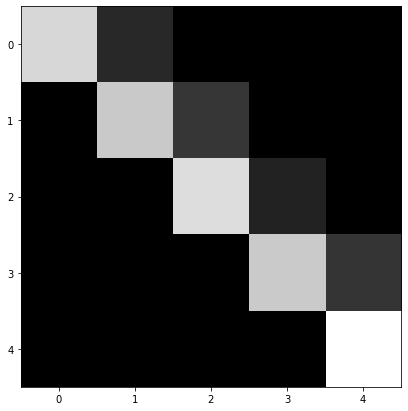

In [29]:
plt.figure(figsize=(15,7))
plt.imshow(A0, cmap='gray')

In [35]:
def etat_suivant_ligne(ligne_A):
    unif = np.random.random()
    cs = np.cumsum(ligne_A)
    state = 0
    while (unif >= cs[state]):
        state = state+1
    return state+1
etat_suivant_ligne(A0[2])

3

In [ ]:
def etat_suivant_q(state_t, mat):
    unif = np.random.random()
    cs = np.cumsum(mat[state_t])
    x = cs > unif
    state_t1 = list(x).index(True)
    return state_t1
etat_suivant_q(2, A0)

In [47]:
def generate_seq():
    seq = []
    state = 0
    while state !=4:
        n_state = etat_suivant_q(state,B0)
        seq.append(n_state)
        state = n_state
    return seq

In [57]:
def generate_obs(state,mat):
    unif = np.random.random()
    cs = np.cumsum(mat[:,state])
    x = cs > unif
    idx = list(x).index(True)
    obs = v[:,idx]
    return obs
tst0 = generate_obs(2,B1)
tst0

array([0., 1., 0., 1., 0.])

In [58]:
tst1 = generate_obs(1,B1)
tst1

array([0., 1., 1., 1., 0.])

In [70]:
j = np.hstack((tst0,tst1)).reshape(-1,1)

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

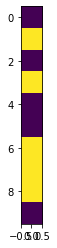

In [71]:
plt.imshow(j)

In [ ]:
plt.imshow(np.hstack([generate_obs(s,B1) for s in generate_seq()]).reshape(-1,1))

In [ ]:
im=[]
# les x contiennent les index dans le dictionnaire
for t in range (0,len(state)):
    im_col=v[:, x[t]-1]
    im.append(im_col)
im = np.array(im).T # now make an array
plt.imshow(im*255, cmap=’Greys’, interpolation=’none’, aspect=’auto’)